In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls 'drive'

MyDrive  Shareddrives


In [3]:
import os
path = "/content/drive/My Drive/Colab Notebooks/bird/"
os.chdir(path)

In [4]:
!ls

flagged  train	用遷移學習打造鳥類辨識AI.ipynb


In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 1. 讀入資料圖檔

In [7]:
# !wget --no-check-certificate \
#     https://github.com/yenlung/Deep-Learning-Basics/raw/master/images/myna.zip \
#     -O /content/myna.zip

In [8]:
# !wget --no-check-certificate \
#     https://www.dropbox.com/s/8gj5sf0xd76t1ti/train.zip?dl=0 \
#     -O data/myna.zip

In [9]:
!ls

flagged  train	用遷移學習打造鳥類辨識AI.ipynb


In [10]:
# import os
# import zipfile

# local_zip = 'myna.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('')
# zip_ref.close()

In [11]:
# !ls

大家在處理照片時，常會想，要怎麼標記呢? 其實可以像這樣子: 有三個類別, 就用三個資料夾存, 每個資料夾裡的照片讀出來, 就用 0, 1, 2 來標記!

### 2. 把照片轉成訓練資料


In [12]:
base_dir = 'train/'

In [13]:
# myna_folders = ['crested_myna', 'javan_myna', 'common_myna']
# print(type(myna_folders))

In [14]:
import os
allFileList = os.listdir(base_dir)
myna_folders = []
for file in allFileList:
  if os.path.isdir(os.path.join(base_dir,file)):
    myna_folders.append(file)
    #print("I'm a directory: " + file)

In [15]:
print(myna_folders)

['YELLOW CACIQUE', 'YELLOW BELLIED FLOWERPECKER', 'WHITE CHEEKED TURACO', 'WILD TURKEY', 'WHITE NECKED RAVEN', 'WOOD DUCK', 'WHITE THROATED BEE EATER', 'WILSONS BIRD OF PARADISE', 'WHITE TAILED TROPIC', 'YELLOW HEADED BLACKBIRD', 'WHITE BROWED CRAKE', 'WHIMBREL', 'VULTURINE GUINEAFOWL', 'WATTLED CURASSOW', 'WATTLED LAPWING', 'WALL CREAPER', 'VIOLET GREEN SWALLOW', 'VICTORIA CROWNED PIGEON', 'VERMILION FLYCATHER', 'VIOLET TURACO', 'TURQUOISE MOTMOT', 'VENEZUELIAN TROUPIAL', 'TROPICAL KINGBIRD', 'TOUCHAN', 'VARIED THRUSH', 'TRUMPTER SWAN', 'UMBRELLA BIRD', 'TREE SWALLOW', 'TURKEY VULTURE', 'TOWNSENDS WARBLER', 'SUPERB STARLING', 'TIT MOUSE', 'TAKAHE', 'STRIPPED MANAKIN', 'SWINHOES PHEASANT', 'TAIWAN MAGPIE', 'STRIPPED SWALLOW', 'TAILORBIRD', 'TASMANIAN HEN', 'TEAL DUCK', 'SPOON BILED SANDPIPER', 'STRIPED OWL', 'SRI LANKA BLUE MAGPIE', 'SPOTTED CATBIRD', 'SPOONBILL', 'STEAMER DUCK', 'STORK BILLED KINGFISHER', 'SPLENDID WREN', 'SPANGLED COTINGA', 'STRAWBERRY FINCH', 'SORA', 'SNOWY OWL', 'S

我們可以列出在某個資料夾的檔名!

In [16]:
thedir = base_dir + myna_folders[0]
os.listdir(thedir)

['1.jpg', '4.jpg', '5.jpg', '2.jpg', '3.jpg']

In [17]:
print(len(myna_folders))

400


做成輸入 (data)、輸出 (target)。

In [18]:
data = []
target = []

for i in range(len(myna_folders)):
    thedir = base_dir + myna_folders[i]
    myna_fnames = os.listdir(thedir)
    for myna in myna_fnames:
        img = load_img(thedir + '/' + myna, target_size = (256,256))
        x = img_to_array(img)
        data.append(x)
        target.append(i)


In [19]:
data = np.array(data)

我們選張圖來看看。

In [20]:
len(data)

2000

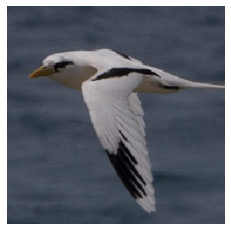

In [21]:
n=41
plt.axis('off')
plt.imshow(data[n]/255);

看來沒有什麼意外, 就是個鳥圖。我們用 ResNet 的預處理再看一次。

In [22]:
x_train = preprocess_input(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


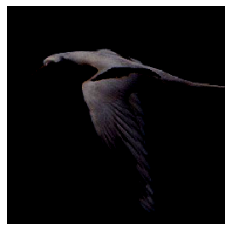

In [23]:
plt.axis('off')
plt.imshow(x_train[n]);

一個答案就是 0, 1, 2 其中一個數字。

In [24]:
target[n]

8

做 one-hot enconding。

In [25]:
y_train = to_categorical(target, 400)

In [26]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 3. 用 ResNet50 打造我們的神經網路

ResNet50 是 2015 ImageNet 的冠軍, 我們用第二版來試試。原本 ImageNet 是做了 1,000 個類別的圖形辨識。我們想直接用來辨識鳥類, 就是把最後一層 (通常就 1,000 個輸出的 dense 層) 砍掉 (`include_top=False`), 然後換我們的就好。

再來我們可以把每個 filter 的結果做個大總合, 例如算每個 filter 計分板的總平均 (global avg pooling), 這本來該我們自己做, 但是 `tf.Keras` 是善良無比的幫我們做好。只要下個參數 `pooling="avg"`)。

In [27]:
resnet = ResNet50V2(include_top=False, pooling="avg")

94683136/94668760 [==============================] - 0s 0us/step


我們是遷移式學習, 原本 ResNet 的部份我們當然沒有重新訓練的意思。於是就設這邊不需要訓練。

In [28]:
resnet.trainable = False

再來就是正式打造我們遷移學習版的函數學習機! 可以發現我們只是加入了最後一層...

In [29]:
model = Sequential()

In [30]:
model.add(resnet)

In [31]:
model.add(Dense(400, activation='softmax'))

#### 組裝我們的函數學習機

這裡我們用分類時非常標準的 `categorical_crossentropy`, 順便試試有名的 `adam` 學習法。

In [32]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#### 欣賞我們的神經網路

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 400)               819600    
                                                                 
Total params: 24,384,400
Trainable params: 819,600
Non-trainable params: 23,564,800
_________________________________________________________________


我們可以發現原來有超過兩千萬個參數, 經我們偷來, 不是, 借來以後, 只有 6,147 個參數要調。

### 4. 訓練 fit

這裡我們全部的資料也只有 23 筆, 所以 `batch_size` 就選擇 23 了...

In [34]:
model.fit(x_train, y_train, batch_size=1000, epochs=10)

Epoch 1/10
2/2 [==============================] - 36s 3s/step - loss: 6.2825 - accuracy: 0.0015
Epoch 2/10
2/2 [==============================] - 7s 3s/step - loss: 5.6579 - accuracy: 0.0240
Epoch 3/10
2/2 [==============================] - 7s 3s/step - loss: 5.1308 - accuracy: 0.1175
Epoch 4/10
2/2 [==============================] - 7s 3s/step - loss: 4.6458 - accuracy: 0.2550
Epoch 5/10
2/2 [==============================] - 7s 3s/step - loss: 4.1762 - accuracy: 0.4290
Epoch 6/10
2/2 [==============================] - 7s 3s/step - loss: 3.7264 - accuracy: 0.5980
Epoch 7/10
2/2 [==============================] - 7s 4s/step - loss: 3.2990 - accuracy: 0.7285
Epoch 8/10
2/2 [==============================] - 7s 4s/step - loss: 2.9010 - accuracy: 0.8205
Epoch 9/10
2/2 [==============================] - 7s 4s/step - loss: 2.5362 - accuracy: 0.8845
Epoch 10/10
2/2 [==============================] - 7s 3s/step - loss: 2.2066 - accuracy: 0.9170


### 5. 預測

對了, 為何這次我們沒有切測試一一資料呢?

In [35]:
y_predict = np.argmax(model.predict(x_train), -1)

In [36]:
y_predict

array([  0,   0,   0, ..., 399, 399, 399])

好奇的話比較一下正確答案。

In [37]:
target

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,


#### `labels`

In [38]:
labels = myna_folders
#myna_folders

In [39]:
print(labels)

['YELLOW CACIQUE', 'YELLOW BELLIED FLOWERPECKER', 'WHITE CHEEKED TURACO', 'WILD TURKEY', 'WHITE NECKED RAVEN', 'WOOD DUCK', 'WHITE THROATED BEE EATER', 'WILSONS BIRD OF PARADISE', 'WHITE TAILED TROPIC', 'YELLOW HEADED BLACKBIRD', 'WHITE BROWED CRAKE', 'WHIMBREL', 'VULTURINE GUINEAFOWL', 'WATTLED CURASSOW', 'WATTLED LAPWING', 'WALL CREAPER', 'VIOLET GREEN SWALLOW', 'VICTORIA CROWNED PIGEON', 'VERMILION FLYCATHER', 'VIOLET TURACO', 'TURQUOISE MOTMOT', 'VENEZUELIAN TROUPIAL', 'TROPICAL KINGBIRD', 'TOUCHAN', 'VARIED THRUSH', 'TRUMPTER SWAN', 'UMBRELLA BIRD', 'TREE SWALLOW', 'TURKEY VULTURE', 'TOWNSENDS WARBLER', 'SUPERB STARLING', 'TIT MOUSE', 'TAKAHE', 'STRIPPED MANAKIN', 'SWINHOES PHEASANT', 'TAIWAN MAGPIE', 'STRIPPED SWALLOW', 'TAILORBIRD', 'TASMANIAN HEN', 'TEAL DUCK', 'SPOON BILED SANDPIPER', 'STRIPED OWL', 'SRI LANKA BLUE MAGPIE', 'SPOTTED CATBIRD', 'SPOONBILL', 'STEAMER DUCK', 'STORK BILLED KINGFISHER', 'SPLENDID WREN', 'SPANGLED COTINGA', 'STRAWBERRY FINCH', 'SORA', 'SNOWY OWL', 'S

### 6. 用 `gradio` 打造鳥類辨識 web app!

In [40]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.1 MB/s 
     |████████████████████████████████| 140 kB 61.8 MB/s 
     |████████████████████████████████| 2.0 MB 50.3 MB/s 
     |████████████████████████████████| 212 kB 47.7 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 256 kB 65.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.3 MB/s 
     |████████████████████████████████| 271 kB 75.0 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB

In [41]:
import gradio as gr

注意現在主函數和我們做辨識 Cooper 的例子很像, 只是現在我們只n個種類。而且是我們的 `model`!

In [57]:
def classify_image(inp):
  inp = inp.reshape((-1, 256, 256, 3))
  print(inp)
  inp = preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(400)}

image = gr.inputs.Image(shape=(256, 256), label="鳥類照片")
label = gr.outputs.Label(num_top_classes=400, label="AI辨識結果")

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [58]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
             title="AI 鳥類辨識機",
             description="我能辨識鳥類!",
             capture_session=True).launch()

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://48353.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f39b465c890>,
 'http://127.0.0.1:7861/',
 'https://48353.gradio.app')

In [46]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
import sys
import numpy as np

In [53]:
model.save_weights("weight_1.h5")

In [54]:
model2 = Sequential()
model2.add(resnet)
model2.add(Dense(400, activation='softmax'))

In [56]:
# 載入參數，只會影響 dense_1 那一層
model2.load_weights("weight_1.h5", by_name = True)

In [59]:
def classify_image(inp):
  inp = inp.reshape((-1, 256, 256, 3))
  print(inp)
  inp = preprocess_input(inp)
  prediction = model2.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(400)}

image = gr.inputs.Image(shape=(256, 256), label="鳥類照片")
label = gr.outputs.Label(num_top_classes=400, label="AI辨識結果")

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [60]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
             title="AI 鳥類辨識機",
             description="我能辨識鳥類!",
             capture_session=True).launch()

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://52913.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f39b39b4890>,
 'http://127.0.0.1:7862/',
 'https://52913.gradio.app')